# Сравнение времени работы алгоритмов поиска паросочетаний и поиска маскимальных независимых множеств

В этой работе мы проведем тестирование работы алгоритмов поиска паросочетаний и поиска независимых множеств, встроенных в библиотеку __networkx__, на примере случайных обычных графов и случайных двудольных графов с последовательно изменяющейся плотностью и числом вершин

## Импорт библиотек

In [1]:
# imports
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.interpolate import CubicSpline


# Пример работы алгоритмов

Для начала ознакомимся с тем, как работают алгоритмы maximum_matching и maximal_independent_set на графическом примере.

Случайный обычный граф:

{(9, 10), (3, 14), (5, 8), (12, 13), (0, 2), (1, 6), (4, 7)}


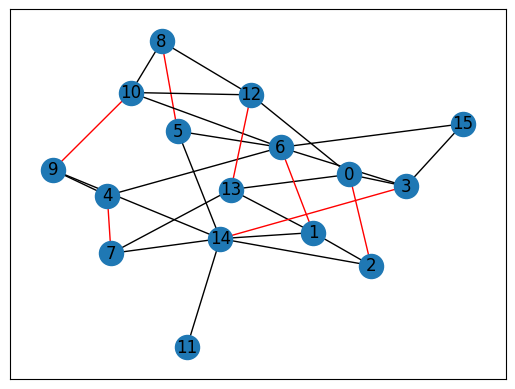

In [24]:
n = 4 * 4  # Число вершин
p = 0.3  # Плотность графа
G = nx.fast_gnp_random_graph(n, p)  # Создаем граф

matchings = nx.maximal_matching(G)  # Вызываем алгоритм
print(matchings)
# Красим ребра, помеченные алгоритмом, в красный цвет
edge_color_list = ["black"]*len(G.edges)
for i, edge in enumerate(G.edges()):
    if edge in matchings:
        edge_color_list[i] = 'red'

# Отображаем граф
nx.draw_networkx(
    G,
    edge_color=edge_color_list
)


[14, 15, 4, 13, 10] 5


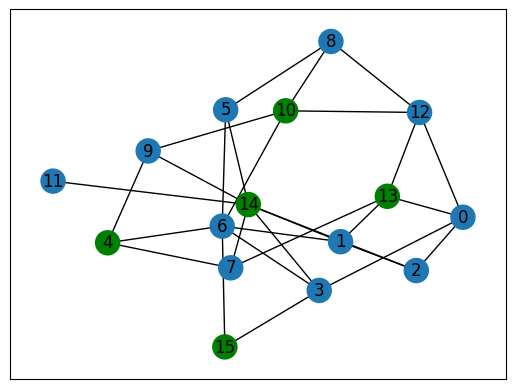

In [25]:
n = 4 * 4  # Число вершин
p = 0.3  # Плотность графа
ind_set = nx.maximal_independent_set(G)

print(ind_set, len(ind_set))

# Красим вершины независимого множества в зеленый цвет
color_map = []
for node in G:
    if node in ind_set:
        color_map.append('green')
    else:
        color_map.append("#1f78b4")

nx.draw_networkx(
    G,
    node_color=color_map,
)


Случайный двудольный граф:

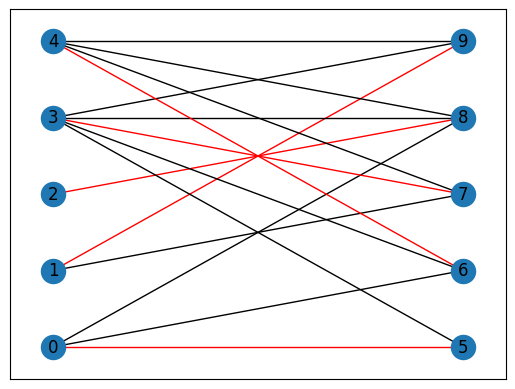

In [26]:
n = 5  # Число вершин одной доли
p = 0.6  # Плотность графа
B = bipartite.gnmk_random_graph(n, n, n * n * p)  # Создаем граф
matchings = nx.bipartite.maximum_matching(B)  # Вызываем алгоритм

# Красим ребра, помеченные алгоритмом, в красный цвет
edge_color_list = ["black"]*len(B.edges)
for i, edge in enumerate(B.edges()):
    if edge[0] in matchings.keys():
        if matchings[edge[0]] == edge[1]:
            edge_color_list[i] = 'red'

# Отображаем граф
nx.draw_networkx(
    B,
    pos=nx.bipartite_layout(B, np.arange(0, n, 1)),
    edge_color=edge_color_list
)


[8, 7, 4] 3


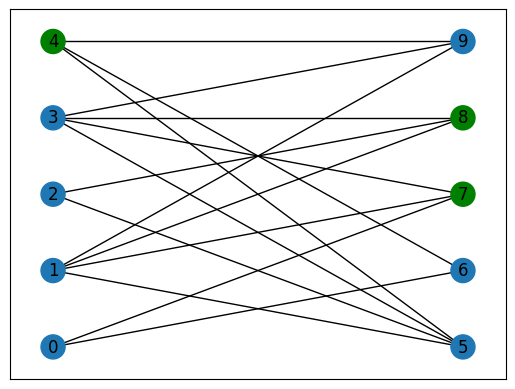

In [27]:
n = 5
p = 0.6
B = bipartite.gnmk_random_graph(n, n, n * n * p)
ind_set = nx.maximal_independent_set(B)

print(ind_set, len(ind_set))

# Красим вершины независимого множества в зеленый цвет
color_map = []
for node in B:
    if node in ind_set:
        color_map.append('green')
    else:
        color_map.append("#1f78b4")

nx.draw_networkx(
    B,
    node_color=color_map,
    pos=nx.bipartite_layout(B, np.arange(0, n, 1))
)


## Анализ алгоритма поиска паросочетаний

In [2]:
def test_regular_matching_density(n_vertices, density_array, max_iter):
    time_array = []
    edges_array = []

    G = 0

    for d in density_array:
        for _ in range(max_iter):
            G = nx.fast_gnp_random_graph(n_vertices, d)
            if (nx.is_connected(G)):
                break

        # Разогревочный пробег алгоритма
        nx.maximal_matching(G)
        start = time.perf_counter()  # Засекаем время
        nx.maximal_matching(G)  # и пытаемся вызвать алгоритм
        end = time.perf_counter()

        # Добавляем засеченное время в массив
        time_array.append(end - start)
        # Добавляем число вершин в массив
        edges_array.append(len(G.edges))

    return time_array, edges_array


In [3]:
densities = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n_vertices = 2000
time_array, edges_array = test_regular_matching_density(
    n_vertices, densities, 100)


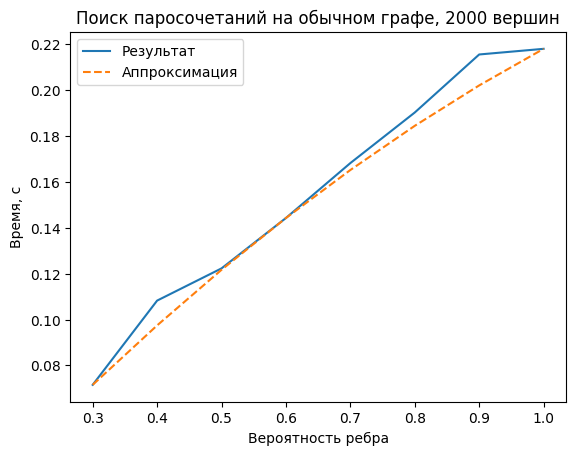

In [4]:
plt.title('Поиск паросочетаний на обычном графе, {} вершин'.format(n_vertices))
plt.xlabel('Вероятность ребра')
plt.ylabel('Время, с')
plt.plot(densities, time_array, label="Результат")

x = [densities[0], densities[3], densities[-1]]
y = [time_array[0], time_array[3], time_array[-1]]
cs = CubicSpline(x, y)

plt.plot(densities, cs(densities), linestyle="dashed", label="Аппроксимация")
plt.legend()
plt.show()


In [5]:
def test_regular_matching_vertices(vertices_array, density, max_iter):
    time_array = []
    edges_array = []

    G = 0

    for v in vertices_array:
        for _ in range(max_iter):
            G = nx.fast_gnp_random_graph(v, density)
            if (nx.is_connected(G)):
                break

        # Разогревочный пробег алгоритма
        nx.maximal_matching(G)
        start = time.perf_counter()  # Засекаем время
        nx.maximal_matching(G)  # и пытаемся вызвать алгоритм
        end = time.perf_counter()

        # Добавляем засеченное время в массив
        time_array.append(end - start)
        # Добавляем число вершин в массив
        edges_array.append(len(G.edges))

    return time_array, edges_array


In [6]:
density = 0.5
vertices_array = np.arange(100, 2001, 100)
time_array, edges_array = test_regular_matching_vertices(
    vertices_array, density, 100)


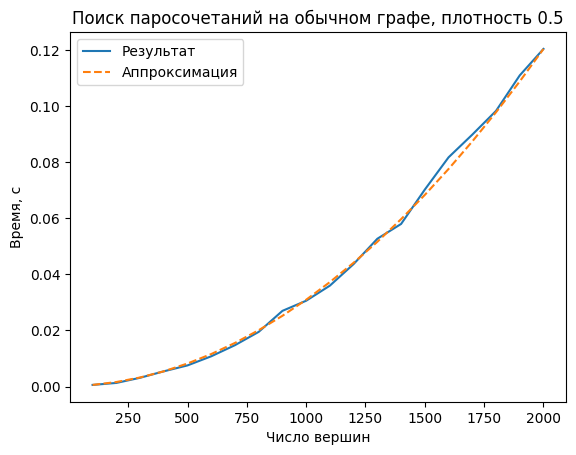

In [7]:
plt.title('Поиск паросочетаний на обычном графе, плотность {}'.format(density))
plt.xlabel('Число вершин')
plt.ylabel('Время, с')
plt.plot(vertices_array, time_array, label="Результат")

x = [vertices_array[0], vertices_array[3], vertices_array[-1]]
y = [time_array[0], time_array[3], time_array[-1]]
cs = CubicSpline(x, y)

plt.plot(vertices_array, cs(vertices_array),
         linestyle="dashed", label="Аппроксимация")
plt.legend()
plt.show()


In [11]:
def test_bipartite_matching_density(n_vertices, density_array, max_iter):
    time_array = []
    edges_array = []

    B = 0

    for d in density_array:
        for _ in range(max_iter):
            B = bipartite.gnmk_random_graph(
                n_vertices, n_vertices, n_vertices * n_vertices * d)
            if (nx.is_connected(B)):
                break

        # Разогревочный пробег алгоритма
        nx.bipartite.maximum_matching(B)
        start = time.perf_counter()  # Засекаем время
        nx.bipartite.maximum_matching(B)  # и пытаемся вызвать алгоритм
        end = time.perf_counter()

        # Добавляем засеченное время в массив
        time_array.append(end - start)
        # Добавляем число вершин в массив
        edges_array.append(len(B.edges))

    return time_array, edges_array


In [12]:
densities = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n_vertices = 1000
time_array, edges_array = test_bipartite_matching_density(
    n_vertices, densities, 100)


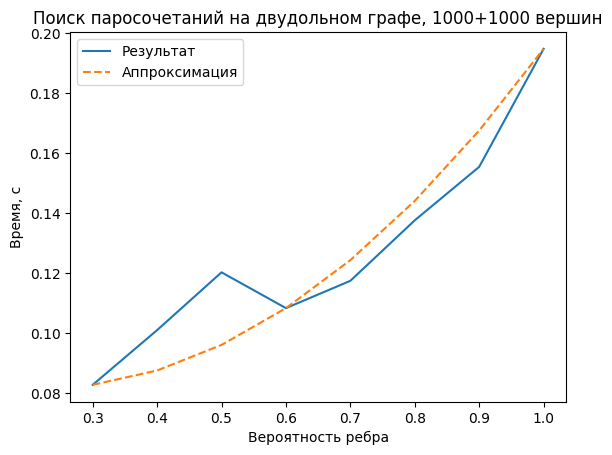

In [13]:
plt.title('Поиск паросочетаний на двудольном графе, {}+{} вершин'.format(n_vertices, n_vertices))
plt.xlabel('Вероятность ребра')
plt.ylabel('Время, с')
plt.plot(densities, time_array, label="Результат")

x = [densities[0], densities[3], densities[-1]]
y = [time_array[0], time_array[3], time_array[-1]]
cs = CubicSpline(x, y)

plt.plot(densities, cs(densities), linestyle="dashed", label="Аппроксимация")
plt.legend()
plt.show()


In [49]:
def test_bipartite_matching_vertices(vertices_array, density, max_iter):
    time_array = []
    edges_array = []

    B = 0

    for v in vertices_array:
        for _ in range(max_iter):
            B = bipartite.gnmk_random_graph(v, v, v * v * density)
            if (nx.is_connected(B)):
                break

        # Разогревочный пробег алгоритма
        nx.bipartite.maximum_matching(B)
        start = time.perf_counter()  # Засекаем время
        nx.bipartite.maximum_matching(B)  # и пытаемся вызвать алгоритм
        end = time.perf_counter()

        # Добавляем засеченное время в массив
        time_array.append(end - start)
        # Добавляем число вершин в массив
        edges_array.append(len(G.edges))

    return time_array, edges_array


In [50]:
density = 0.5
vertices_array = np.arange(100, 1001, 100)
time_array, edges_array = test_bipartite_matching_vertices(
    vertices_array, density, 100)


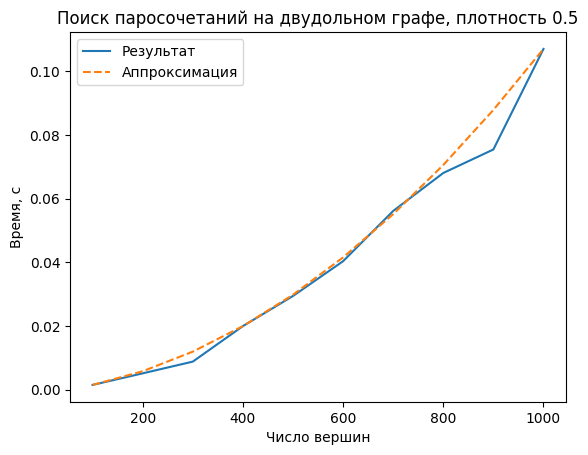

In [51]:
plt.title('Поиск паросочетаний на двудольном графе, плотность {}'.format(density))
plt.xlabel('Число вершин')
plt.ylabel('Время, с')
plt.plot(vertices_array, time_array, label="Результат")

x = [vertices_array[0], vertices_array[3], vertices_array[-1]]
y = [time_array[0], time_array[3], time_array[-1]]
cs = CubicSpline(x, y)

plt.plot(vertices_array, cs(vertices_array),
         linestyle="dashed", label="Аппроксимация")
plt.legend()
plt.show()


## Анализ алгоритма поиска максимального независимого множества

In [14]:
def test_regular_independent_density(n_vertices, density_array, max_iter):
    time_array = []
    edges_array = []

    G = 0

    for d in density_array:
        for _ in range(max_iter):
            G = nx.fast_gnp_random_graph(n_vertices, d)
            if (nx.is_connected(G)):
                break

        # Разогревочный пробег алгоритма
        nx.maximal_independent_set(G)
        start = time.perf_counter()  # Засекаем время
        nx.maximal_independent_set(G)  # и пытаемся вызвать алгоритм
        end = time.perf_counter()

        # Добавляем засеченное время в массив
        time_array.append(end - start)
        # Добавляем число вершин в массив
        edges_array.append(len(G.edges))

    return time_array, edges_array


In [15]:
densities = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n_vertices = 2000
time_array, edges_array = test_regular_independent_density(
    n_vertices, densities, 100)


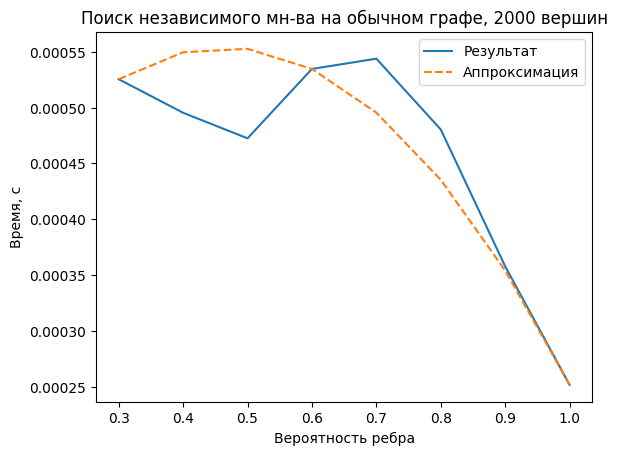

In [16]:
plt.title('Поиск независимого мн-ва на обычном графе, {} вершин'.format(n_vertices))
plt.xlabel('Вероятность ребра')
plt.ylabel('Время, с')
plt.plot(densities, time_array, label="Результат")

x = [densities[0], densities[3], densities[-1]]
y = [time_array[0], time_array[3], time_array[-1]]
cs = CubicSpline(x, y)

plt.plot(densities, cs(densities), linestyle="dashed", label="Аппроксимация")
plt.legend()
plt.show()


In [17]:
def test_regular_independent_vertices(vertices_array, density, max_iter):
    time_array = []
    edges_array = []

    G = 0

    for v in vertices_array:
        for _ in range(max_iter):
            G = nx.fast_gnp_random_graph(v, density)
            if (nx.is_connected(G)):
                break

        # Разогревочный пробег алгоритма
        nx.maximal_independent_set(G)
        start = time.perf_counter()  # Засекаем время
        nx.maximal_independent_set(G)  # и пытаемся вызвать алгоритм
        end = time.perf_counter()

        # Добавляем засеченное время в массив
        time_array.append(end - start)
        # Добавляем число вершин в массив
        edges_array.append(len(G.edges))

    return time_array, edges_array


In [18]:
density = 0.5
vertices_array = np.arange(100, 2001, 100)
time_array, edges_array = test_regular_independent_vertices(
    vertices_array, density, 100)


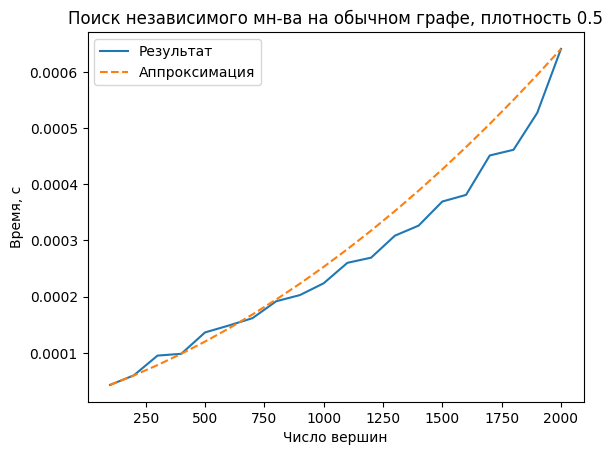

In [19]:
plt.title('Поиск независимого мн-ва на обычном графе, плотность {}'.format(density))
plt.xlabel('Число вершин')
plt.ylabel('Время, с')
plt.plot(vertices_array, time_array, label="Результат")

x = [vertices_array[0], vertices_array[3], vertices_array[-1]]
y = [time_array[0], time_array[3], time_array[-1]]
cs = CubicSpline(x, y)

plt.plot(vertices_array, cs(vertices_array),
         linestyle="dashed", label="Аппроксимация")
plt.legend()
plt.show()


In [22]:
def test_bipartite_independent_density(n_vertices, density_array, max_iter):
    time_array = []
    edges_array = []

    B = 0

    for d in density_array:
        for _ in range(max_iter):
            B = bipartite.gnmk_random_graph(
                n_vertices, n_vertices, n_vertices * n_vertices * d)
            if (nx.is_connected(B)):
                break

        # Разогревочный пробег алгоритма
        nx.maximal_independent_set(B)
        start = time.perf_counter()  # Засекаем время
        nx.maximal_independent_set(B)  # и пытаемся вызвать алгоритм
        end = time.perf_counter()

        # Добавляем засеченное время в массив
        time_array.append(end - start)
        # Добавляем число вершин в массив
        edges_array.append(len(B.edges))

    return time_array, edges_array


In [35]:
densities = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n_vertices = 1000
time_array, edges_array = test_bipartite_independent_density(
    n_vertices, densities, 100)


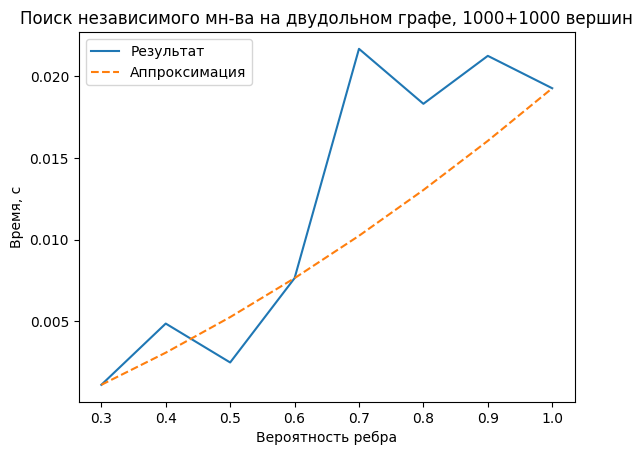

In [36]:
plt.title('Поиск независимого мн-ва на двудольном графе, {}+{} вершин'.format(n_vertices, n_vertices))
plt.xlabel('Вероятность ребра')
plt.ylabel('Время, с')
plt.plot(densities, time_array, label="Результат")

x = [densities[0], densities[3], densities[-1]]
y = [time_array[0], time_array[3], time_array[-1]]
cs = CubicSpline(x, y)

plt.plot(densities, cs(densities), linestyle="dashed", label="Аппроксимация")
plt.legend()
plt.show()


In [30]:
def test_bipartite_independent_vertices(vertices_array, density, max_iter):
    time_array = []
    edges_array = []

    B = 0

    for v in vertices_array:
        for _ in range(max_iter):
            B = bipartite.gnmk_random_graph(v, v, v * v * density)
            if (nx.is_connected(B)):
                break

        # Разогревочный пробег алгоритма
        nx.maximal_independent_set(B)
        start = time.perf_counter()  # Засекаем время
        nx.maximal_independent_set(B)  # и пытаемся вызвать алгоритм
        end = time.perf_counter()

        # Добавляем засеченное время в массив
        time_array.append(end - start)
        # Добавляем число вершин в массив
        edges_array.append(len(B.edges))

    return time_array, edges_array


In [33]:
density = 0.5
vertices_array = np.arange(100, 1001, 100)
time_array, edges_array = test_bipartite_independent_vertices(
    vertices_array, density, 100)


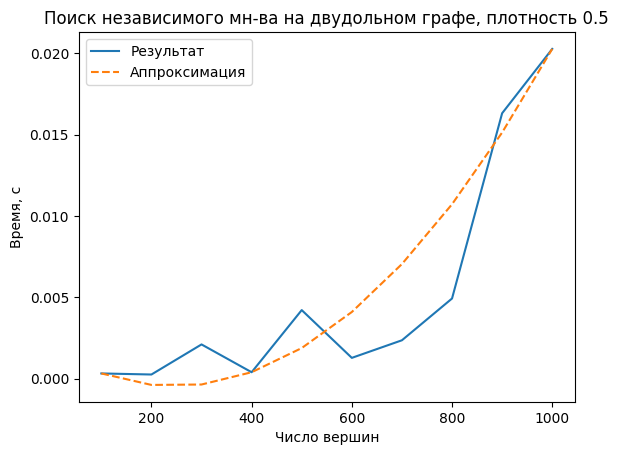

In [34]:
plt.title(
    'Поиск независимого мн-ва на двудольном графе, плотность {}'.format(density))
plt.xlabel('Число вершин')
plt.ylabel('Время, с')
plt.plot(vertices_array, time_array, label="Результат")

x = [vertices_array[0], vertices_array[3], vertices_array[-1]]
y = [time_array[0], time_array[3], time_array[-1]]
cs = CubicSpline(x, y)

plt.plot(vertices_array, cs(vertices_array),
         linestyle="dashed", label="Аппроксимация")
plt.legend()
plt.show()
